In [ ]:
#    ____       _       _
#   |  _ \  ___| |_ __ | |__   __ _  ___
#   | | | |/ _ \ | '_ \| '_ \ / _` |/ _ \
#   | |_| |  __/ | |_) | | | | (_| |  __/
#   |____/ \___|_| .__/|_| |_|\__,_|\___|
#                |_|

In [1]:
%pylab inline
from scipy.integrate import odeint
from scipy.misc import derivative

Populating the interactive namespace from numpy and matplotlib


Handbook for Exact Solutions for Ordinary Diff. Eq. , Second Edition<br>
Polyanin, Zaitsev<br>
par. 2.1.2, item 123<br>

### Euler equation
#### solve
$
x^2y''+axy'+by=0,\ a=0,\ b=\frac{1}{4}
$
<br>
so that $(1-a)^2 = 4b$
<br>

devide by $x^2$ gives<br>
$
y''+\frac{1}{4x^2}y=0
$

#### solution
$
y = |x|^\frac{1}{2}\cdot (c_1+c_2ln(x))
$

### from exact (y) to odeint (y'')

1.0 1.4999999999876223


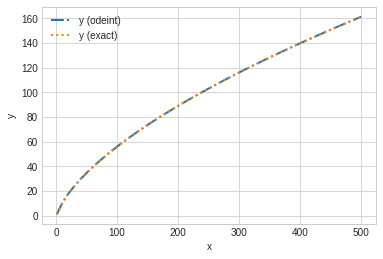

In [2]:
# exact
c1 = 1.0
c2 = 1.0

def Y(x):
    x = np.abs(x)
    return np.sqrt(x)*(c1+c2*np.log(x))
def dY(x):
    return derivative(Y, x, dx=1e-6)

def func((y0,y1), x):
    y2 = -y0/(4*x*x)
    return y1, y2

# odeint
y0 = Y(1)
y1 = dY(1)
print y0, y1
x = np.linspace(1,500)
ys = odeint(func, [y0,y1], x)

# plot
plt.plot (x, ys[:,0], '-.', label="y (odeint)", lw=2)
plt.plot (x, Y(x), ':', label="y (exact)", lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend();
plt.grid(True);

### from y'' to exact

2 4.0


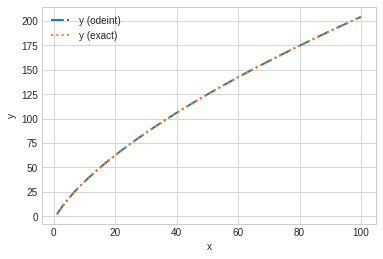

In [25]:
# exact
def func((y0,y1), x):
    y2 = -y0/(4*x*x)
    return y1, y2


# odeint
#x = np.linspace(1,10)
ys = odeint(func, [y0,y1], x)

c1 = y0
c2 = y1-0.5*y0
print c1, c2
def Y(x):
    x = np.abs(x)
    return np.sqrt(x)*(c1+c2*np.log(x))

# plot
plt.plot (x, ys[:,0], '-.', label="y (odeint)", lw=2)
plt.plot (x, Y(x), ':', label="y (exact)", lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend();
plt.grid(True);

#### Euler equation
#### solve
$
x^2y''+axy'+by=0, a=-1, b=1
$
<br>
so that $(1-a)^2 = 4b$

devide by $x^2$ gives
<br>
$
y''-\frac{1}{x}y+\frac{1}{x^2}y=0
$

#### solution
$
y = |x|\cdot (c_1+c_2ln(x))
$

2 3


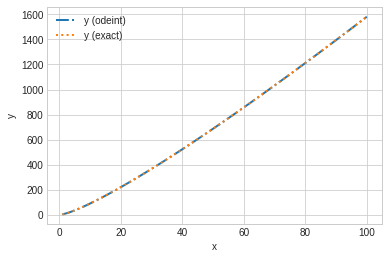

In [24]:
def func((y0,y1), x):
    y2 = y1/x - y0/(x*x)
    return y1, y2

y0 = 2
y1 = 5

# odeint
x = np.linspace(1,100)
ys = odeint(func, [y0,y1], x)

# exact
c1 = y0
c2 = y1-y0
print c1, c2
def Y(x):
    x = np.abs(x)
    return x*(c1+c2*np.log(x))

# plot
plt.plot (x, ys[:,0], '-.', label="y (odeint)", lw=2)
plt.plot (x, Y(x), ':', label="y (exact)", lw=2)
plt.xlabel('x')
plt.ylabel('y')
#plt.yscale('log')
plt.legend();
plt.grid(True);